<a href="https://colab.research.google.com/github/NikhilRevs/CodsoftMLInternship/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset downloaded to: /kaggle/input/genre-classification-dataset-imdb
Loaded data sample:
      genre                                               plot
0     drama  Listening in to a conversation between his doc...
1  thriller  A brother and sister with a past incestuous re...
2     adult  As the bus empties the students for their fiel...
3     drama  To help their unemployed father make ends meet...
4     drama  The film's title refers not only to the un-rec...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

      action       0.51      0.25      0.34       263
       adult       0.75      0.21      0.33       112
   adventure       0.42      0.14      0.21       139
   animation       0.60      0.09      0.15       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.59      0.55      1443
       crime       0.29      0.02      0.04       107
 documentary       0.66      0.85      0.74      2659
       drama       0.54      0.78      0.64      2697
      family       0.39      0.07      0.12       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.94      0.42      0.59        40
     history       0.00      0.00      0.00        45
      horror       0.64      0.56      0.60       431
       music       0.62      0.47      0.54       144
     musical       1.00      0.02      0.04        50
     mystery       0.00      0.00      0.00        56
  

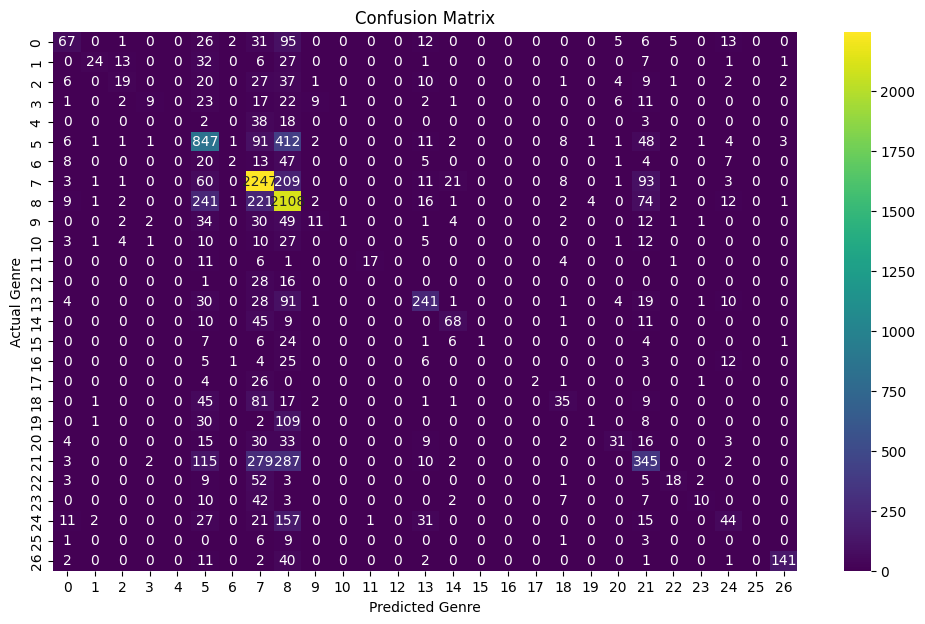

In [4]:
# MOVIE GENRE CLASSIFICATION

import kagglehub
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("hijest/genre-classification-dataset-imdb")
print("Dataset downloaded to:", path)

train_file = os.path.join(path, "Genre Classification Dataset", "train_data.txt")

data = []
with open(train_file, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split(" ::: ")
        if len(parts) >= 4:
            genre = parts[2]
            plot = parts[3]
            data.append((genre, plot))

df = pd.DataFrame(data, columns=["genre", "plot"])
print("Loaded data sample:")
print(df.head())

if df.empty:
    raise ValueError("No valid data loaded. Please check train_data.txt format.")

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['plot'])
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(12, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.show()